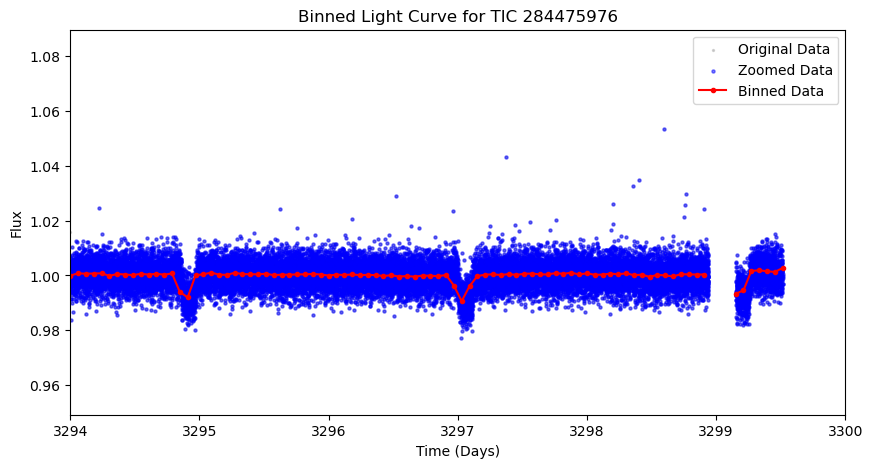

In [1]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt

# Search and download light curve
TIC = "TIC 284475976"
data = lk.search_lightcurve(TIC, author="SPOC")
lc = data.download_all().stitch()

# Define bin size (adjust as needed)
num_bins = 100  # Number of bins in the selected time range

# Select time range
time_mask = (lc.time.value >= 3294) & (lc.time.value <= 3300)
time_selected = lc.time.value[time_mask]
flux_selected = lc.flux.value[time_mask]

# Bin the data
binned_time = np.linspace(time_selected.min(), time_selected.max(), num_bins)
binned_flux = np.zeros(num_bins - 1)

for i in range(len(binned_time) - 1):
    mask = (time_selected >= binned_time[i]) & (time_selected < binned_time[i + 1])
    if np.any(mask):  # Avoid empty bins
        binned_flux[i] = np.nanmean(flux_selected[mask])
    else:
        binned_flux[i] = np.nan  # Assign NaN to empty bins

# Plot original light curve
plt.figure(figsize=(10, 5))
plt.scatter(lc.time.value, lc.flux.value, s=2, color="gray", alpha=0.3, label="Original Data")
plt.scatter(time_selected, flux_selected, s=5, color="blue", alpha=0.5, label="Zoomed Data")
plt.plot(binned_time[:-1], binned_flux, color="red", lw=1.5, marker='o', markersize=3, label="Binned Data")

# Set plot limits
plt.xlim(3294, 3300)
plt.xlabel("Time (Days)")
plt.ylabel("Flux")
plt.title("Binned Light Curve for TIC 284475976")
plt.legend()
plt.show()


In [2]:
bls = lc.to_periodogram(method="bls", minimum_period=0.5, maximum_period=50)
best_period = bls.period_at_max_power
print(f"Best estimated period: {best_period:.2f} days")


ValueError: `period` contains 10845722 points.Periodogram is too large to evaluate. Consider setting `frequency_factor` to a higher value.

In [ ]:
lc_folded = lc.fold(period=best_period)
plt.figure(figsize=(8, 5))
plt.scatter(lc_folded.phase, lc_folded.flux, s=5, alpha=0.5, color="blue")
plt.xlabel("Phase")
plt.ylabel("Flux")
plt.title("Phase-Folded Light Curve")
plt.show()
